In [1]:
#import kagglehub

In [2]:
# Download latest version
#path = kagglehub.dataset_download("krishujeniya/heart-diseae")

#print("Path to dataset files:", path)

import pandas as pd
import numpy as np
import seabor as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report, roc_curve

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [4]:
df= pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape

(303, 14)

There are 303 rows and 14 coumns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# statistical analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Understanding

- Age – Age of the patient (in years).

- sex – Gender (1 = male, 0 = female).

- cp – Type of chest pain:

    0 = Typical angina (chest pain caused by heart stress)

    1 = Atypical angina (less common type of chest pain)

    2 = Non-anginal pain (pain not related to the heart)

    3 = Asymptomatic (no chest pain).

- trestbps – Resting blood pressure (in mm Hg).

- chol – Level of cholesterol in the blood (mg/dl).

- fbs – Fasting blood sugar above 120 mg/dl (1 = yes, 0 = no).

- restecg – Result of an electrocardiogram (ECG, heart electrical activity test):

    0 = Normal

    1 = Minor abnormality (ST-T wave change)

    2 = Possible heart muscle thickening.

- thalach – Maximum heart rate reached during exercise.

- exang – Whether exercise caused chest pain (1 = yes, 0 = no).

- oldpeak – Amount of change in the ECG after exercise (higher values can indicate heart problems).

- slope – Shape (slope) of the ECG line during exercise:

    0 = Upward

    1 = Flat

    2 = Downward.

- ca – Number of major blood vessels (0–3) seen in imaging tests.

- thal – Type of thalassemia (a blood disorder affecting oxygen transport):

    0 = Normal

    1 = Fixed defect (possible permanent issue)

    2 = Reversible defect (temporary issue).

- target – Whether the person has heart disease (1 = disease present, 0 = no disease).

In [89]:
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseAngina',
    'oldpeak': 'Oldpeak',
    'slope': 'ST_Slope',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace=True)


In [11]:
df.dtypes

Age                  int64
Sex                  int64
ChestPainType        int64
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG           int64
MaxHeartRate         int64
ExerciseAngina       int64
Oldpeak            float64
ST_Slope             int64
NumMajorVessels      int64
Thalassemia          int64
HeartDisease         int64
dtype: object

In [12]:
df.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHeartRate       0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thalassemia        0
HeartDisease       0
dtype: int64

There are no null values.

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [14]:
df.duplicated().sum()

1

In [15]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

There are:
- 302 unique rows
- 1 duplicate row

In [16]:
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHeartRate,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thalassemia,HeartDisease
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [17]:
# remove the duplicated row
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

- Dropped the duplicated row since it was just a single row.

#### Addressing Data types

- Categorical – A feature that represents groups or categories (not continuous numbers).
- Binary – A special type of categorical data that has only two categories (0/1, Yes/No, True/False).

Thus, the need to address data types of the following columns;cp, restecg, slope, thal,target and sex.

In [19]:
# changing data type of sex and target to binary/catgeory dtype
binary_cols= ['Sex','HeartDisease']
df[binary_cols]= df[binary_cols].astype('category')
# changing data types of cp, restecg, slope, thal to category
category_cols=['ChestPainType', 'RestingECG', 'ST_Slope', 'Thalassemia']
df[category_cols]= df[category_cols].astype('category')



In [20]:
# confirm the change of data types
df.dtypes


Age                   int64
Sex                category
ChestPainType      category
RestingBP             int64
Cholesterol           int64
FastingBS             int64
RestingECG         category
MaxHeartRate          int64
ExerciseAngina        int64
Oldpeak             float64
ST_Slope           category
NumMajorVessels       int64
Thalassemia        category
HeartDisease       category
dtype: object

In [21]:
df['Sex'].value_counts()

1    206
0     96
Name: Sex, dtype: int64

### Outliers & Class Imbalance

In [22]:
#Check for class imbalance
df['HeartDisease'].value_counts(normalize=True) * 100

1    54.304636
0    45.695364
Name: HeartDisease, dtype: float64

The target variable (HeartDisease) is well balanced, with about 54% of patients having heart disease and 46% not having it. This balance ensures that the model can learn both classes effectively without needing resampling techniques.

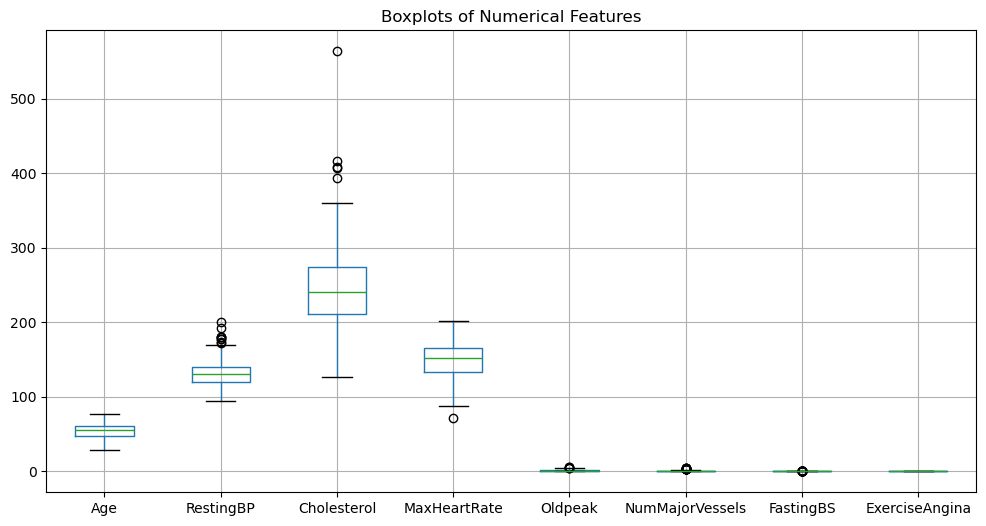

In [23]:
# check for outliers
numeric_cols = ['Age', 'RestingBP', 'Cholesterol','MaxHeartRate', 'Oldpeak', 'NumMajorVessels', 'FastingBS', 'ExerciseAngina']

plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numerical Features")
plt.show()


Therefore, considering the boxplot; 
- Cholesterol- has few high outliers above 400.

- RestingBP- has some high outliers up to 200.

- MaxHeartRate- has one low outlier near 70.

- Oldpeak- is mostly around 0 with few higher values up to 5.

- Age, NumMajorVessels, FastingBS, ExerciseAngina - distributions are compact with few or no outliers.


I'll keep all outliers because;

- High cholesterol (400-550): Indicates severe cardiovascular risk.
- High RestingBP (180-200): Stage 2-3 hypertension which is a strong heart disease predictor.
- Low MaxHeartRate (<90): May indicate cardiac dysfunction or poor cardiovascular fitness.

These aren't errors - they're critical diagnostic indicators

In [24]:
# using interquartile range to see each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
outliers


Age                 0
RestingBP           9
Cholesterol         5
MaxHeartRate        1
Oldpeak             5
NumMajorVessels    24
FastingBS          45
ExerciseAngina      0
dtype: int64

In [25]:
df['FastingBS'].value_counts()

0    257
1     45
Name: FastingBS, dtype: int64

In [26]:
df['NumMajorVessels'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: NumMajorVessels, dtype: int64

IQR assumes continuous, normally-distributed data. It fails for:
- Binary variables (two values only)
- Categorical variables (discrete levels)
- Count data (0, 1, 2, 3...)

### Distribution Analysis

#### Univariate Distributions (Individual Features)

In [27]:
# Countplot()- for discrete columns
# histplot()- for continuous columns

<Axes: xlabel='Age', ylabel='Count'>

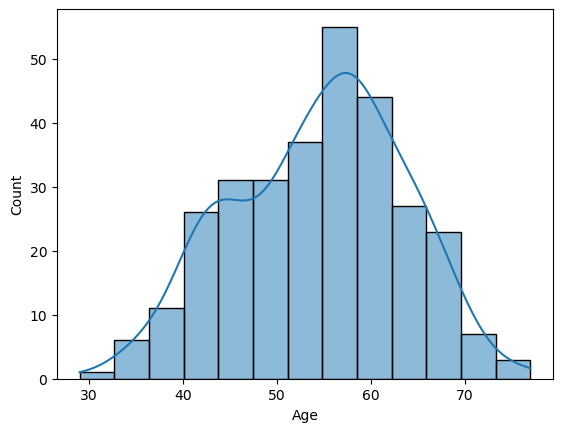

In [28]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='ChestPainType', ylabel='count'>

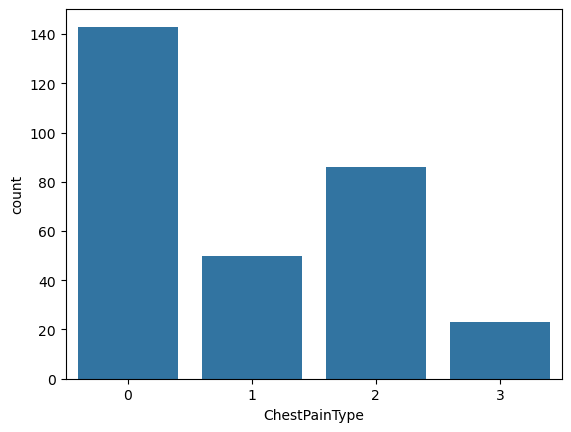

In [29]:
sns.countplot(data=df, x= 'ChestPainType')

<Axes: xlabel='Sex', ylabel='count'>

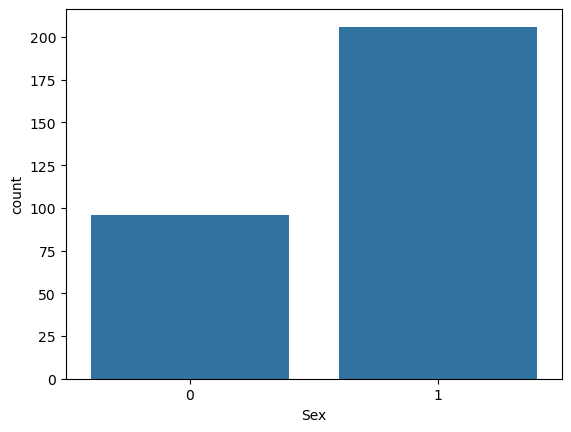

In [30]:
sns.countplot(data=df, x= 'Sex')

<Axes: xlabel='HeartDisease', ylabel='count'>

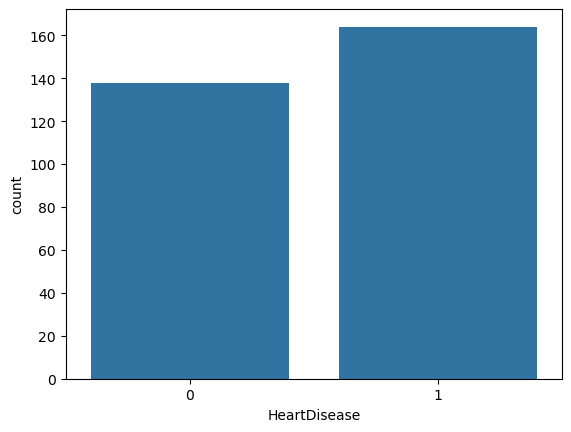

In [31]:
sns.countplot(data=df, x= 'HeartDisease')

<Axes: xlabel='Thalassemia', ylabel='count'>

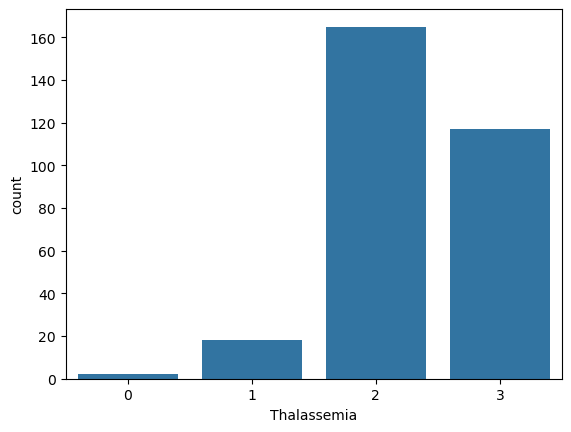

In [32]:
sns.countplot(data=df, x= 'Thalassemia')

<Axes: xlabel='ST_Slope', ylabel='count'>

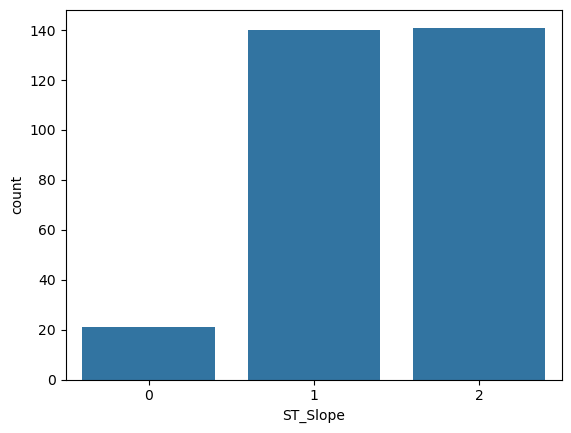

In [33]:
sns.countplot(data=df, x= 'ST_Slope')

<Axes: xlabel='RestingECG', ylabel='count'>

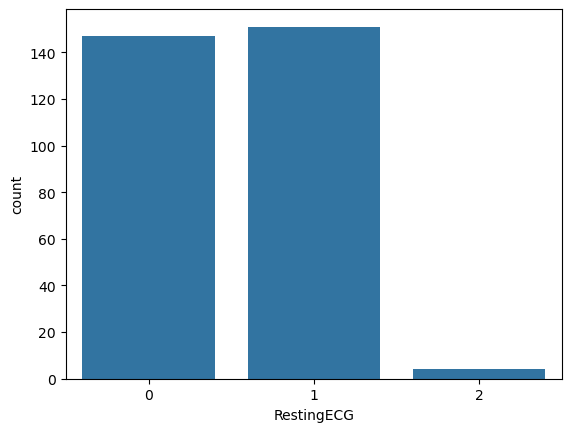

In [34]:
sns.countplot(data=df, x= 'RestingECG')

<Axes: xlabel='NumMajorVessels', ylabel='Count'>

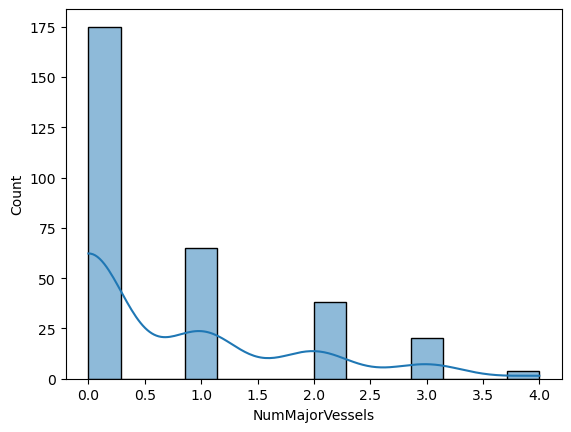

In [35]:
sns.histplot(df['NumMajorVessels'], kde=True)

<Axes: xlabel='ExerciseAngina', ylabel='Count'>

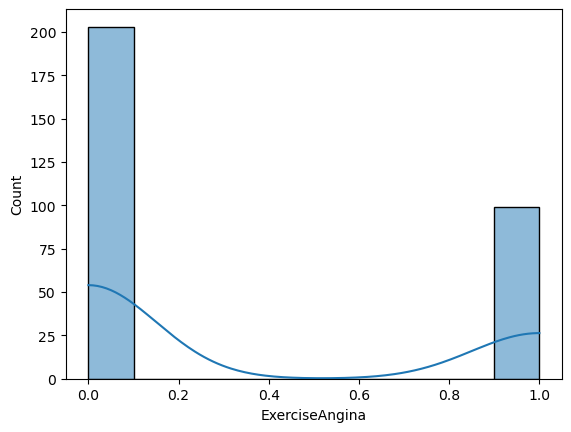

In [36]:
sns.histplot(df['ExerciseAngina'], kde=True)

<Axes: xlabel='MaxHeartRate', ylabel='Count'>

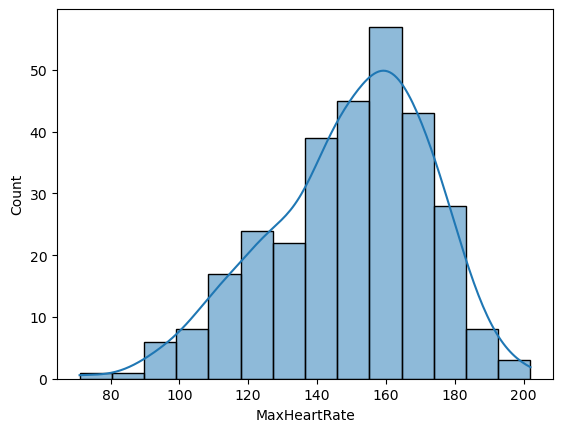

In [37]:
sns.histplot(df['MaxHeartRate'], kde=True)

<Axes: xlabel='FastingBS', ylabel='Count'>

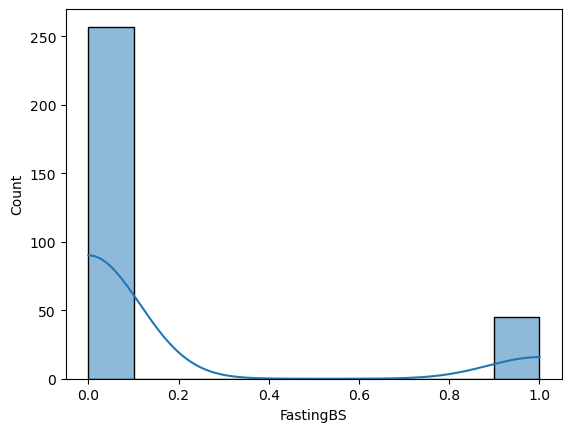

In [38]:
sns.histplot(df['FastingBS'], kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

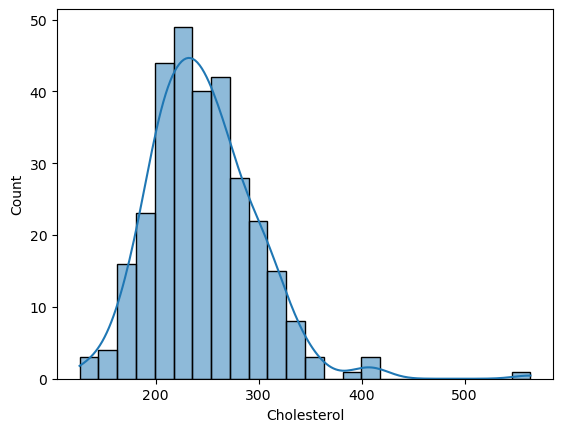

In [39]:
sns.histplot(df['Cholesterol'], kde=True)

<Axes: xlabel='RestingBP', ylabel='Count'>

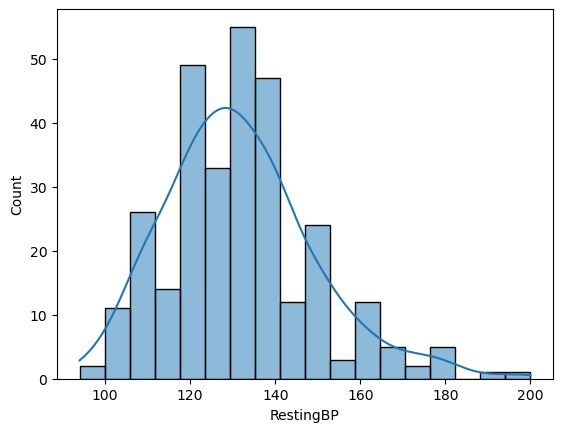

In [40]:
sns.histplot(df['RestingBP'], kde=True)

### Relationship Analysis

##### Bivariate Distributions (vs Target)

<Axes: xlabel='HeartDisease', ylabel='Age'>

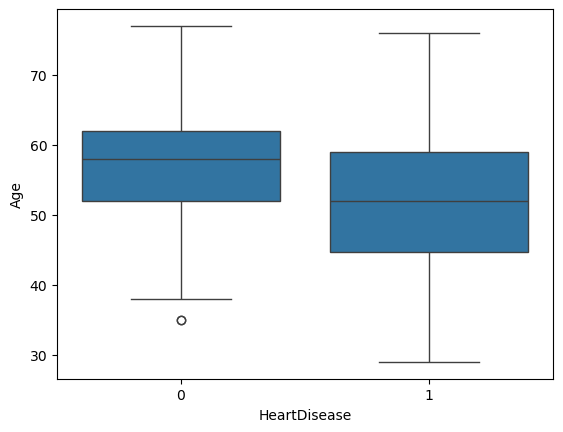

In [41]:
sns.boxplot( x=df['HeartDisease'], y=df['Age'])

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

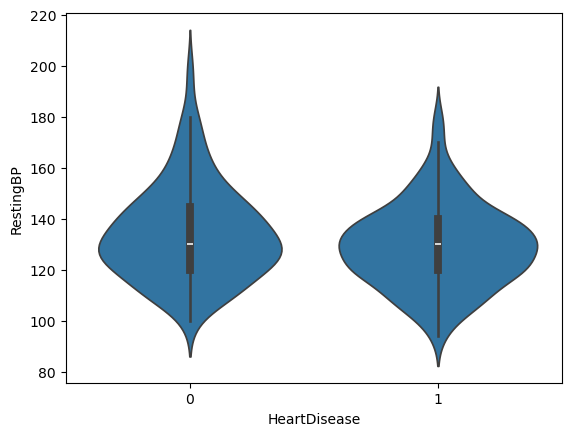

In [42]:
sns.violinplot( x=df['HeartDisease'], y=df['RestingBP'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

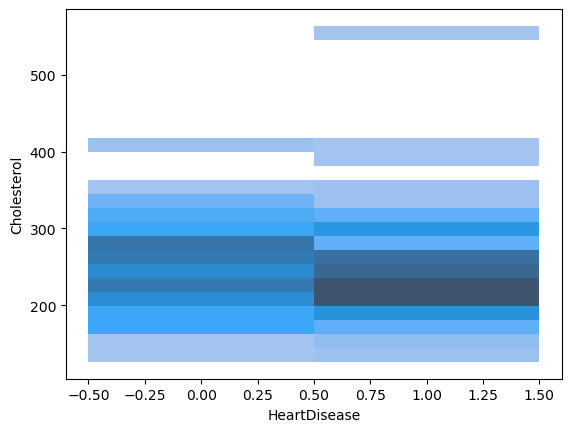

In [43]:
sns.histplot( x=df['HeartDisease'], y=df['Cholesterol'])

<Axes: xlabel='HeartDisease', ylabel='MaxHeartRate'>

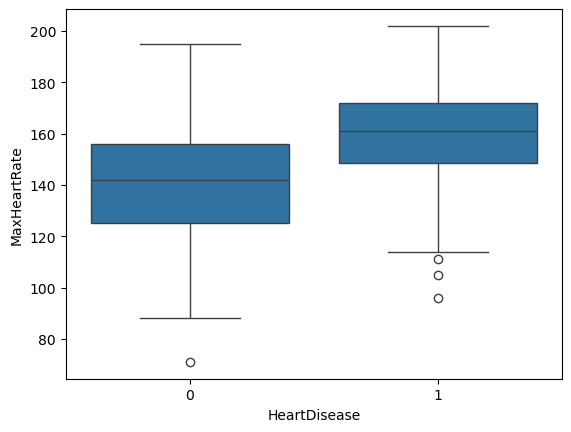

In [44]:
sns.boxplot( x=df['HeartDisease'], y=df['MaxHeartRate'])

<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

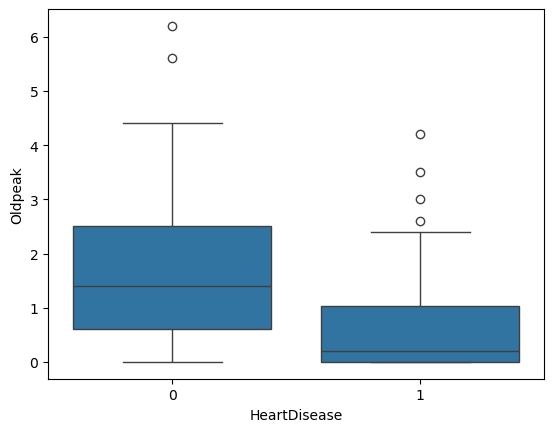

In [45]:
sns.boxplot( x=df['HeartDisease'], y=df['Oldpeak'])

<Axes: xlabel='HeartDisease', ylabel='count'>

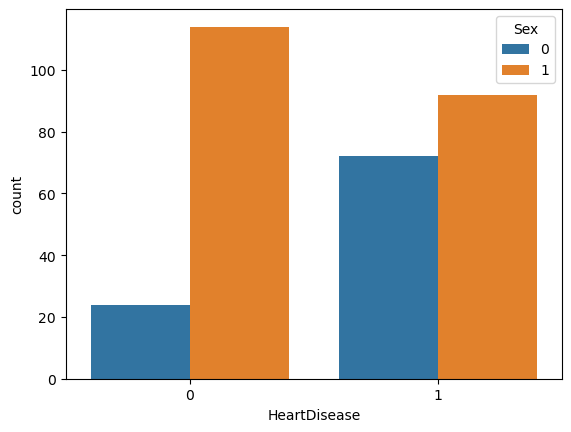

In [46]:
sns.countplot( df,x='HeartDisease', hue='Sex')

<Axes: xlabel='ChestPainType', ylabel='count'>

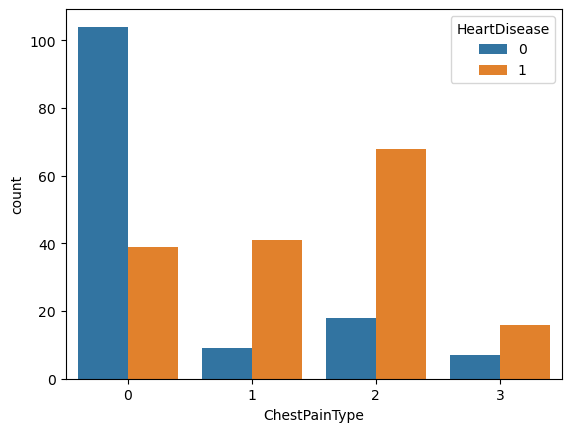

In [47]:
sns.countplot( df,x='ChestPainType', hue='HeartDisease')

In [48]:
df1=df.copy()
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHeartRate,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thalassemia,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
 #Map numeric codes to meaningful labels
cp_labels = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
}

df1['ChestPainType'] = df1['ChestPainType'].map(cp_labels)
# Percentage of Heart Disease within each Chest Pain Type
percentages = df1.groupby('ChestPainType',observed=True)['HeartDisease'].value_counts(normalize=True) * 100
# Round to 2 decimals for readability
percentages = percentages.round(2)

# Make it easier to read — put results into a table
percentages = percentages.unstack()  
percentages.columns = ['No Disease (%)', 'Disease (%)']

print(f"Percentage of Heart Disease by Chest Pain Type:")
print(percentages)

Percentage of Heart Disease by Chest Pain Type:
                  No Disease (%)  Disease (%)
ChestPainType                                
Asymptomatic               30.43        69.57
Non-Anginal Pain           20.93        79.07
Atypical Angina            18.00        82.00
Typical Angina             72.73        27.27


<Axes: xlabel='RestingECG', ylabel='count'>

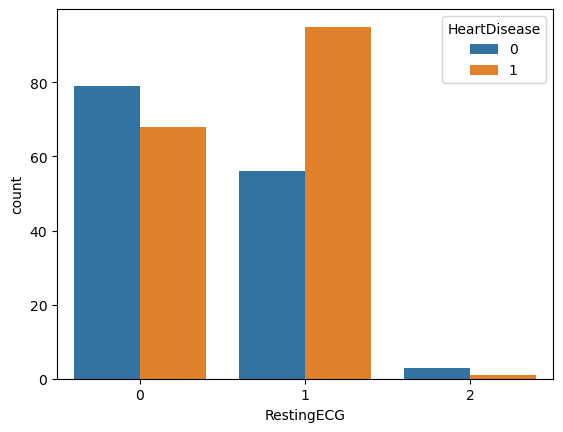

In [50]:
sns.countplot( df, x='RestingECG', hue='HeartDisease')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

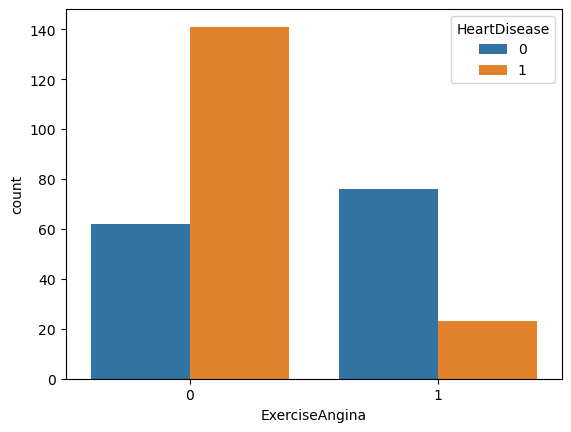

In [51]:
sns.countplot( df,x='ExerciseAngina', hue='HeartDisease')

<Axes: xlabel='ST_Slope', ylabel='count'>

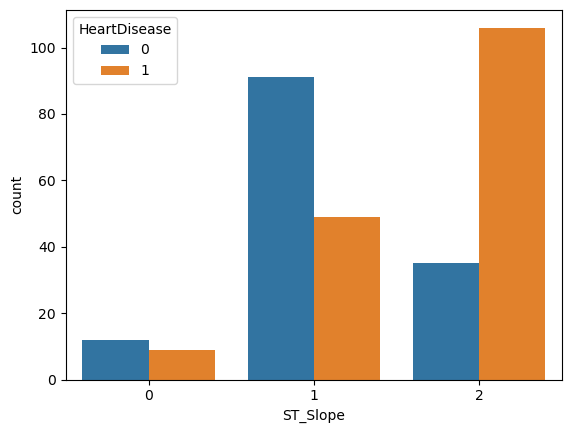

In [52]:
sns.countplot( df,x='ST_Slope', hue='HeartDisease')

<Axes: xlabel='Thalassemia', ylabel='count'>

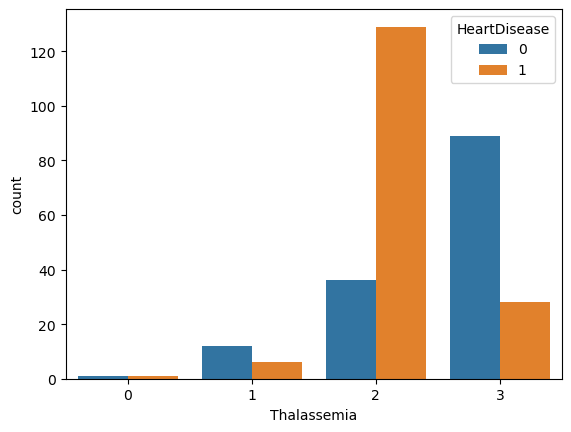

In [53]:
sns.countplot( df,x='Thalassemia', hue='HeartDisease')

In [54]:
corr= df.corr(numeric_only=True)
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHeartRate,ExerciseAngina,Oldpeak,NumMajorVessels
Age,1.000000,0.283121,0.207216,0.119492,-0.395235,0.093216,0.206040,0.302261
RestingBP,0.283121,1.000000,0.125256,0.178125,-0.048023,0.068526,0.194600,0.099248
Cholesterol,0.207216,0.125256,1.000000,0.011428,-0.005308,0.064099,0.050086,0.086878
FastingBS,0.119492,0.178125,0.011428,1.000000,-0.007169,0.024729,0.004514,0.144935
MaxHeartRate,-0.395235,-0.048023,-0.005308,-0.007169,1.000000,-0.377411,-0.342201,-0.228311
ExerciseAngina,0.093216,0.068526,0.064099,0.024729,-0.377411,1.000000,0.286766,0.125377
Oldpeak,0.206040,0.194600,0.050086,0.004514,-0.342201,0.286766,1.000000,0.236560
NumMajorVessels,0.302261,0.099248,0.086878,0.144935,-0.228311,0.125377,0.236560,1.000000


<Axes: >

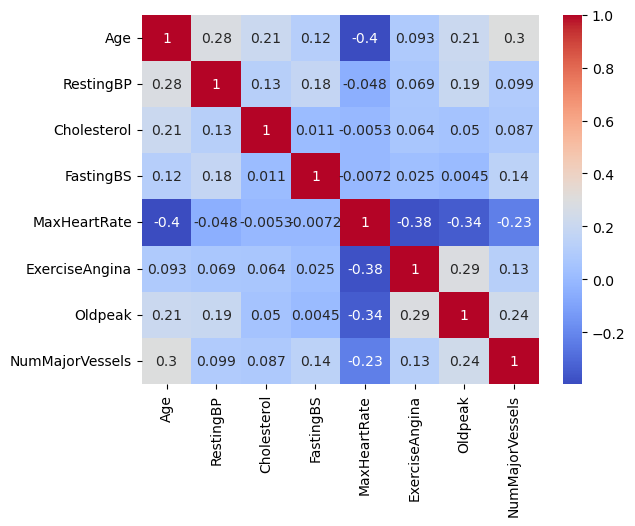

In [55]:
sns.heatmap(corr, annot=True, cmap='coolwarm')


C:\Users\priscillah\AppData\Local\Temp\ipykernel_11704\675770871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = df.corrwith(df['HeartDisease'])


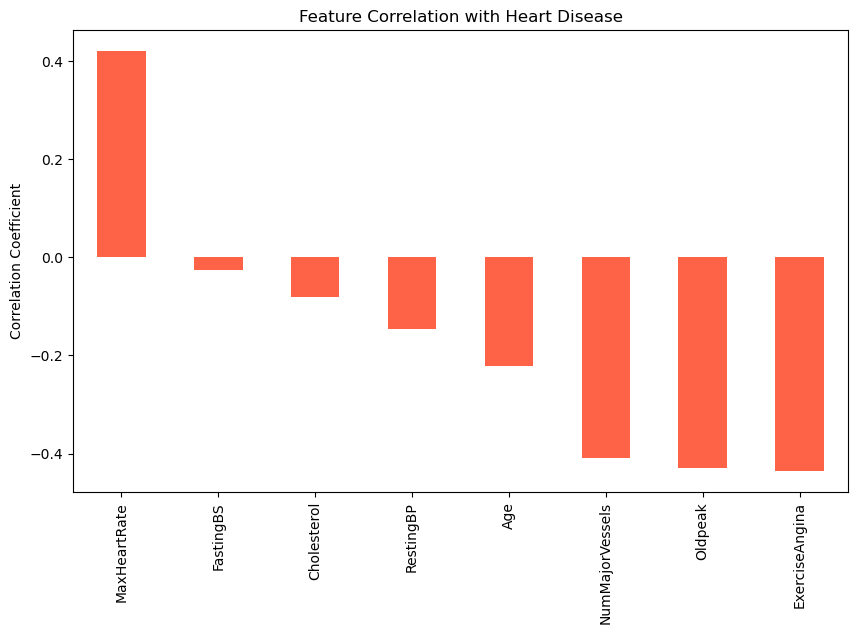

In [56]:
# Check correlation with target variable
corr_with_target = df.corrwith(df['HeartDisease'])
corr_with_target = corr_with_target.sort_values(ascending=False)

plt.figure(figsize=(10,6))
corr_with_target.plot(kind='bar', color='tomato')
plt.title('Feature Correlation with Heart Disease')
plt.ylabel('Correlation Coefficient')
plt.show()

In [57]:
# Create a summary of key metrics by gender and disease status
# Map numeric codes to descriptive labels
sex_labels = {0: 'Female', 1: 'Male'}
heart_labels = {0: 'No Disease', 1: 'Heart Disease'}

# Convert to integers first
df1['Sex'] = df1['Sex'].astype(int).map({0: 'Female', 1: 'Male'})
df1['HeartDisease'] = df1['HeartDisease'].astype(int).map({0: 'No Disease', 1: 'Heart Disease'})


# Group and show means for each subgroup
summary = df1.groupby(['Sex', 'HeartDisease'],observed=True).mean(numeric_only=True).round(2)

print("Average Health Measures by Sex and Heart Disease Status:\n")
print(summary)

Average Health Measures by Sex and Heart Disease Status:

                        Age  RestingBP  Cholesterol  FastingBS  MaxHeartRate  \
Sex    HeartDisease                                                            
Female Heart Disease  54.56     128.74       256.75       0.08        154.03   
       No Disease     59.04     146.12       274.96       0.25        142.42   
Male   Heart Disease  51.04     129.65       231.60       0.18        161.78   
       No Disease     56.09     131.93       246.06       0.14        138.40   

                      ExerciseAngina  Oldpeak  NumMajorVessels  
Sex    HeartDisease                                             
Female Heart Disease            0.11     0.55             0.31  
       No Disease               0.58     1.84             1.29  
Male   Heart Disease            0.16     0.61             0.37  
       No Disease               0.54     1.53             1.14  


1. Age

- Females with heart disease are slightly younger on average than females without disease (54.56 vs 59.04).

- Males with heart disease are also slightly younger than those without disease (51.04 vs 56.09).

2. RestingBP and Cholesterol

- Females without heart disease have higher average RestingBP (146.12) and Cholesterol (274.96) than females with heart disease.

- Males with heart disease have slightly lower RestingBP (129.65) and Cholesterol (231.60) than males without disease (131.93 and 246.06).


3. Fasting Blood Sugar (FastingBS) and MaxHeartRate

- FastingBS is low across all groups, slightly higher in females without disease.

- Maximum heart rate is higher in males with heart disease (161.78) compared to males without disease (138.40).

4. Exercise Angina, Oldpeak, NumMajorVessels

- Exercise Angina appears more frequent in those without disease in this dataset (0.54–0.58), which may reflect coding or sample specifics.

- Oldpeak (ST depression during exercise) is higher in those without disease — also may reflect dataset coding.

- NumMajorVessels is slightly higher in people without disease, which seems counterintuitive; could indicate dataset quirks.

In [58]:
# Calculate disease prevalence by gender
total_males = len(df[df['Sex'] == 1])
total_females = len(df[df['Sex'] == 0])

diseased_males = len(df[(df['Sex'] == 1) & (df['HeartDisease'] == 1)])
diseased_females = len(df[(df['Sex'] == 0) & (df['HeartDisease'] == 1)])

print(f"Disease prevalence in males: {diseased_males/total_males*100:.1f}%")
print(f"Disease prevalence in females: {diseased_females/total_females*100:.1f}%")

Disease prevalence in males: 44.7%
Disease prevalence in females: 75.0%


Females in this dataset show a much higher prevalence of heart disease (75%) compared to males (44.7%), which is a 30.3 percentage point difference.

In [91]:
# Separate data by gender
male_data = df[df['Sex'] == 1]
female_data = df[df['Sex'] == 0]

print("\nCorrelation with Heart Disease - Males:")
print(male_data.corr()['HeartDisease'].sort_values(ascending=False))

print("\nCorrelation with Heart Disease - Females:")
print(female_data.corr()['HeartDisease'].sort_values(ascending=False))

Males-  MaxHeartRate, ChestPainType, and ST_Slope are the strongest positive correlates with heart disease.
Females- ChestPainType and ST_Slope are the strongest positive correlates, while Oldpeak, NumMajorVessels, and Thalassemia show strong negative correlations.

### Modelling

#### 1.K-Nearest Neighbors

In [60]:
## target variable
X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']

In [61]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHeartRate', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'NumMajorVessels', 'Thalassemia', 'HeartDisease'],
      dtype='object')

In [62]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHeartRate', 'Oldpeak', 'NumMajorVessels']
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Thalassemia']

In [63]:
# scaling numeric features
scaler=StandardScaler()

In [64]:
# Range of k values
k_values = range(1, 21)
cv_scores = []

cross_val_score automatically splits the data into folds (in the range(1,21)).

Each fold acts as a "mini test set" while the rest is the "mini training set."

It repeats this for each fold, then averages the accuracy.

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
for k in k_values:
    knn_pipeline = Pipeline([
        ('scale', StandardScaler()),  # scale numeric features
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    
    scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [67]:
# Display CV scores
for k, score in zip(k_values, cv_scores):
    print(f"k={k}: CV Accuracy = {score:.4f}")


k=1: CV Accuracy = 0.7419
k=2: CV Accuracy = 0.7647
k=3: CV Accuracy = 0.8313
k=4: CV Accuracy = 0.8145
k=5: CV Accuracy = 0.8210
k=6: CV Accuracy = 0.8310
k=7: CV Accuracy = 0.8210
k=8: CV Accuracy = 0.8278
k=9: CV Accuracy = 0.8244
k=10: CV Accuracy = 0.8343
k=11: CV Accuracy = 0.8310
k=12: CV Accuracy = 0.8343
k=13: CV Accuracy = 0.8342
k=14: CV Accuracy = 0.8242
k=15: CV Accuracy = 0.8175
k=16: CV Accuracy = 0.8274
k=17: CV Accuracy = 0.8309
k=18: CV Accuracy = 0.8308
k=19: CV Accuracy = 0.8309
k=20: CV Accuracy = 0.8276


In [68]:
# Find the best k
best_k = k_values[np.argmax(cv_scores)]
print(f"The best k: {best_k} with CV Accuracy = {max(cv_scores):.4f}")

The best k: 12 with CV Accuracy = 0.8343


In [69]:
# train knn using the best k-value-12
knn_model= Pipeline([('scaler',scaler),
                    ('knn', KNeighborsClassifier(n_neighbors=best_k))])

In [70]:
knn_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=12))])

In [71]:
# predictions
predictions = knn_model.predict(X)
print("First 10 predictions:", predictions[:10])

First 10 predictions: [1 1 1 1 1 1 1 1 1 1]


In [72]:
from sklearn.model_selection import cross_val_predict
predictions_c = cross_val_predict(knn_model, X, y, cv=5)
print("First 25 CV predictions:", predictions_c[:25])

# Confusion matrix
cm = confusion_matrix(y, predictions_c)
print(cm)

First 25 CV predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
[[109  29]
 [ 21 143]]


Interpretation:

- True 0 predicted 0 → 109

- True 0 predicted 1 → 29

- True 1 predicted 0 → 21

- True 1 predicted 1 → 143

Accuracy ≈ (109+143)/(109+29+21+143) ≈ 0.82 (~82%).

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
## Hyperparameter tuning
param_grid = {
    'knn__n_neighbors': range(3, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 12, 'knn__weights': 'distance'}
Best CV accuracy: 0.8408743169398907


# Or Train_Test_Split

In [75]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [77]:
KNN_model= KNeighborsClassifier(n_neighbors=5)

In [78]:
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [79]:
# predictions
predictions_knn = KNN_model.predict(X_test_scaled)
print("First 10 predictions:", predictions_knn[:10])

First 10 predictions: [0 0 1 0 1 1 1 0 0 1]


In [80]:
# Evaluate accuracy
accuracy = KNN_model.score(X_test_scaled, y_test)  
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9180327868852459


In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm_knn = confusion_matrix(y_test, predictions_knn)
print("Confusion Matrix:")
print(cm_knn)

Confusion Matrix:
[[28  1]
 [ 4 28]]


In [85]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_knn = confusion_matrix(y_test, predictions_knn)

print("Confusion Matrix:")
print("Actual/Predicted | Negative (0) | Positive (1)")
print("-" * 45)
print(f"Negative (0)     | {cm_knn[0,0]:^11} | {cm_knn[0,1]:^11}")
print(f"Positive (1)     | {cm_knn[1,0]:^11} | {cm_knn[1,1]:^11}")

Confusion Matrix:
Actual/Predicted | Negative (0) | Positive (1)
---------------------------------------------
Negative (0)     |     28      |      1     
Positive (1)     |      4      |     28     


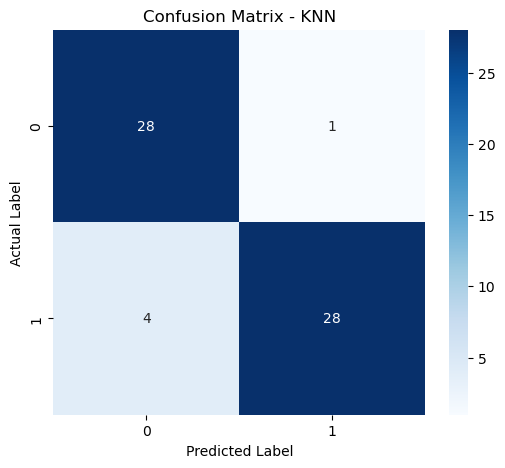

In [87]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, predictions_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Interpretation;
- True 0 predicted as 0 → 28

- True 0 predicted as 1 → 1

- True 1 predicted as 0 → 4

- True 1 predicted as 1 → 28

The model correctly predicted 91% of the test samples.

#### Key Observations 


- Best k matters: Choosing k=12 optimizes the model’s performance.

- Scaling numeric features is essential for distance-based models like KNN.

Cross-validation vs train-test split:

- CV provides a reliable estimate of model performance using all data.

- Train-test split shows realistic performance on unseen data.


Model performance is strong: Accuracy 91% on test set, confusion matrix shows most predictions correct.

In [ ]:
 model=KNeighborsClassifier()

In [ ]:
print(model.get_params())